In [1]:
# %load ./import.py
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
!ls ./Data

Baseball96.xlsx  Countryregion.xlsx  Grocery.xlsx  USmacrodata.xls
Cardata.xlsx	 Fizzy.xlsx	     Oreos.xlsx


In [2]:
# ols_diag(df,X,model, nlag=1, remove_outliers=False):
from ols_diag import ols_diag

#### 3.       The file Countryregion.xlsx contains the following data for several underdeveloped countries:
 
         ■ Infant mortality rate
 
         ■ Adult literacy rate
 
         ■ Percentage of students finishing primary school
 
         ■ Per capita GNP
 
 Use this data to develop an equation that can be used to predict infant mortality. Are there any outliers in this set of data? Interpret the coefficients in your equation. Within what value should 95 percent of your predictions for infant mortality be accurate?
 
 

In [3]:
cn=pd.read_excel("./Data/Countryregion.xlsx", sheet_name="Sheet1")
cn.head()

,Country,Infant Mortality(deaths per thousand births),%age adult literacy,%age finishing primary school,GNP per capita
0,Cuba,18,98,98,2000
1,Sri Lanka,20,85,92,3300
2,Costa Rica,19,94,84,5800
3,Vietnam,44,85,58,600
4,China,54,80,86,2400


In [4]:
cn.columns

Index(['Country', 'Infant Mortality(deaths per thousand births)',
       '%age adult literacy', '%age finishing primary school',
       'GNP per capita'],
      dtype='object')

In [5]:
y_3=cn[['Infant Mortality(deaths per thousand births)']]
X_3=cn[['%age adult literacy', '%age finishing primary school',
       'GNP per capita']]

In [6]:
X_3=sm.add_constant(X_3)
model_3=sm.OLS(y_3, X_3).fit()
model_3.summary()

/home/boo/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                         OLS Regression Results                                         
========================================================================================================
Dep. Variable:     Infant Mortality(deaths per thousand births)   R-squared:                       0.846
Model:                                                      OLS   Adj. R-squared:                  0.788
Method:                                           Least Squares   F-statistic:                     14.64
Date:                                          Tue, 30 Apr 2019   Prob (F-statistic):            0.00130
Time:                                                  03:52:03   Log-Likelihood:                -44.347
No. Observations:                                            12   AIC:                             96.69
Df Residuals:                                                 8   BIC:                             98.63
Df Model:                                                     3                                         
Covariance Type:                                      nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           154.2055     16.152      9.547      0.000     116.958     191.452
%age adult literacy              -0.6772      0.229     -2.961      0.018      -1.205      -0.150
%age finishing primary school    -0.5982      0.276     -2.169      0.062      -1.234       0.038
GNP per capita                   -0.0029      0.001     -2.271      0.053      -0.006    4.52e-05
==============================================================================
Omnibus:                        0.686   Durbin-Watson:                   1.732
Prob(Omnibus):                  0.710   Jarque-Bera (JB):                0.409
Skew:                           0.409   Prob(JB):                        0.815
Kurtosis:                       2.613   Cond. No.                     2.12e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Dataset: 	 12
X: 	 12
1. Normality Test:  Jarque-Bera Test
-----------------------------------------------
Good
Reason: Residual Normally distributed
-----------------------------------------------


2. Linearity Test:  Rainbow Test
-----------------------------------------------
Good
Reason: Data have linear relationship
-----------------------------------------------


3. Heteroscedasticity Test:  Breusch-Pagan Test
-----------------------------------------------
Good
Reason: Data have same variance accross
-----------------------------------------------


4. Autocorrelation Test:  Breusch Godfrey Test
-----------------------------------------------
Good
Reason: Data are not related to themself:1 lag
-----------------------------------------------


5. Sum of residuals == 0
-----------------------------------------------
Good
Reason: Sum of residuals = 0
-----------------------------------------------


6. Checking outliers:
-----------------------------------------------
Mode select

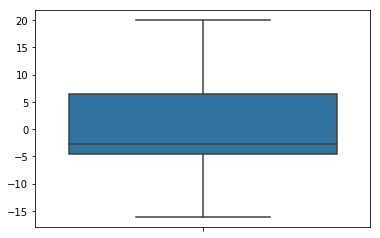

-----------------------------------------------



7. Checking multicolinearity
-----------------------------------------------


<Figure size 432x288 with 0 Axes>

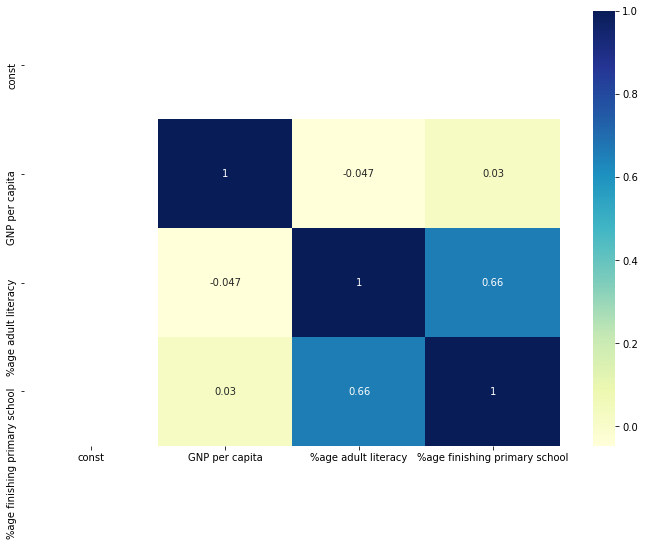

-----------------------------------------------


<Figure size 432x288 with 0 Axes>

In [7]:
ols_diag(cn,X_3,model_3)

#### Ans 3 and Conclusion 

* From above data we see that we do not have any outliers in our data.
* We also see that "%age adult literacy" is the only sigificant parameter affecting the infant Mortality with negative coefficient.
* Every country must hence target to increase Adult Litracy Rate to decreases Infant Mortality rate.
* We do not find any outliers in this data.
